In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
data_dir = "/content/gdrive/MyDrive/Batik Dataset Enhanched/Batik"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=270,
                                   zoom_range=0.2,
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='wrap',
                                   validation_split=0.25)


In [36]:
train_generator = train_datagen.flow_from_directory(data_dir,
                                                    target_size=(224,224),
                                                    shuffle=True,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(data_dir,
                                                         target_size=(224, 224),
                                                         shuffle=False,
                                                         color_mode='rgb',
                                                         class_mode='categorical',
                                                         subset='validation')

Found 772 images belonging to 20 classes.
Found 244 images belonging to 20 classes.


In [10]:
base_model = tf.keras.applications.VGG16(
    include_top=False, weights='imagenet', pooling="max",
    classifier_activation=None
)

model = tf.keras.models.Sequential()
"""
for layer in base_model.layers[:-1]:
    model.add(layer)"""    

# Freeze the layers 
for layer in base_model.layers[:-1]:
    layer.trainable = False

# Add 'softmax' instead of earlier 'prediction' layer.
model.add(base_model)
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(20, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                10260     
Total params: 14,724,948
Trainable params: 10,260
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["acc"])

In [12]:
class myCallback(tf.keras.callbacks.Callback):
        # Your Code
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.95):
                print("\nReached 95% so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

In [13]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=500, steps_per_epoch=15, callbacks=[callbacks])

Epoch 1/500
15/15 [==============================] - 376s 23s/step - loss: 3.5103 - acc: 0.0619 - val_loss: 3.0814 - val_acc: 0.0451
Epoch 2/500
15/15 [==============================] - 102s 7s/step - loss: 3.2492 - acc: 0.0896 - val_loss: 2.9632 - val_acc: 0.1107
Epoch 3/500
15/15 [==============================] - 44s 3s/step - loss: 3.1860 - acc: 0.0796 - val_loss: 2.8728 - val_acc: 0.1557
Epoch 4/500
15/15 [==============================] - 29s 2s/step - loss: 3.0636 - acc: 0.1128 - val_loss: 2.7805 - val_acc: 0.1721
Epoch 5/500
15/15 [==============================] - 21s 1s/step - loss: 2.9331 - acc: 0.1305 - val_loss: 2.7310 - val_acc: 0.1885
Epoch 6/500
15/15 [==============================] - 17s 1s/step - loss: 2.8388 - acc: 0.1770 - val_loss: 2.6523 - val_acc: 0.2213
Epoch 7/500
15/15 [==============================] - 17s 1s/step - loss: 2.7565 - acc: 0.1549 - val_loss: 2.5666 - val_acc: 0.2500
Epoch 8/500
15/15 [==============================] - 17s 1s/step - loss: 2.7180 

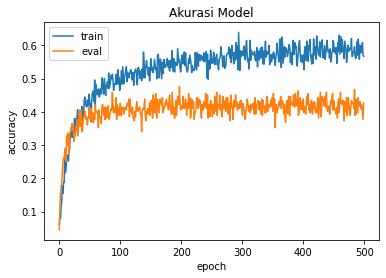

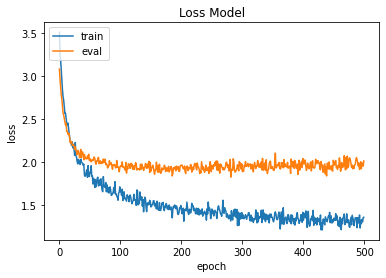

In [14]:
import matplotlib.pyplot as plt

# Accuracy plotting
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

# Loss plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'eval'], loc='upper left')
plt.show()

In [16]:
tf.saved_model.save(model, "Batik Classification V3 - VGG16")


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: Batik Classification V3 - VGG16/assets


In [19]:
!zip -r /content/BatikClassificationV3-VGG16.zip /content/BatikClassificationV3-VGG16

  adding: content/BatikClassificationV3-VGG16/ (stored 0%)
  adding: content/BatikClassificationV3-VGG16/saved_model.pb (deflated 91%)
  adding: content/BatikClassificationV3-VGG16/assets/ (stored 0%)
  adding: content/BatikClassificationV3-VGG16/variables/ (stored 0%)
  adding: content/BatikClassificationV3-VGG16/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/BatikClassificationV3-VGG16/variables/variables.index (deflated 64%)


In [39]:
y_true = validation_generator.classes

print(y_true)

[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  8
  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11
 11 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15
 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19
 19 19 19 19]


In [43]:
predictions = model.predict(validation_generator)
y_pred = np.rint(predictions)
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

[ 0  0  0  0  0 16  0  3  0 14  0  0  1  0  1  1  1  1  1  1  1  0  1  0
  0  2  2  2  2  2  2  2  2  2  0  2  0  0 14  0  0  0 18  0  0  0  1  0
  8  0  0  0  0  4  9  0  4  4  0  0  0 13  0  0  0  0  0  5  0  4  0  0
  0  6  0  0  0  0 13  0  6  0  0  1  0  0  0  0  0  0  0  0  0  0 10  8
  8  8  0  8  8  0  8  8  8  8  8  0  0 12 12  0  0  0  0  4  0  0  0  0
  0  0 10  0 15  0  0  0  0  1 10 15 13 11 11 11 11 11 11  0 11 11 11 11
 11 12  0 12 12 12  0 12 12 12 11 12  8  0  0  0  0  0  0  0  0  8  8  0
  0  0  0  0  0  0  0  0 14 11 15 14  5  0  0  0  0 15 15  0  0 15 15  0
 15  0  0 15  0  0 16  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  6  0  0  0  0  0 18  0  0  0  0 15  0  4  0 15  0 19 19  0
  1 19  0  0]


In [32]:
label = []
import os
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        label.append(os.path.join(dirname, filename).split('/')[-2])

labels = np.unique(label)
ints = np.arange(0, len(label))
dicts = dict(zip(labels, ints))
dicts

{'batik-bali': 0,
 'batik-betawi': 1,
 'batik-celup': 2,
 'batik-cendrawasih': 3,
 'batik-ceplok': 4,
 'batik-ciamis': 5,
 'batik-garutan': 6,
 'batik-gentongan': 7,
 'batik-kawung': 8,
 'batik-keraton': 9,
 'batik-lasem': 10,
 'batik-megamendung': 11,
 'batik-parang': 12,
 'batik-pekalongan': 13,
 'batik-priangan': 14,
 'batik-sekar-jagad': 15,
 'batik-sidoluhur': 16,
 'batik-sidomukti': 17,
 'batik-sogan': 18,
 'batik-tambal': 19}

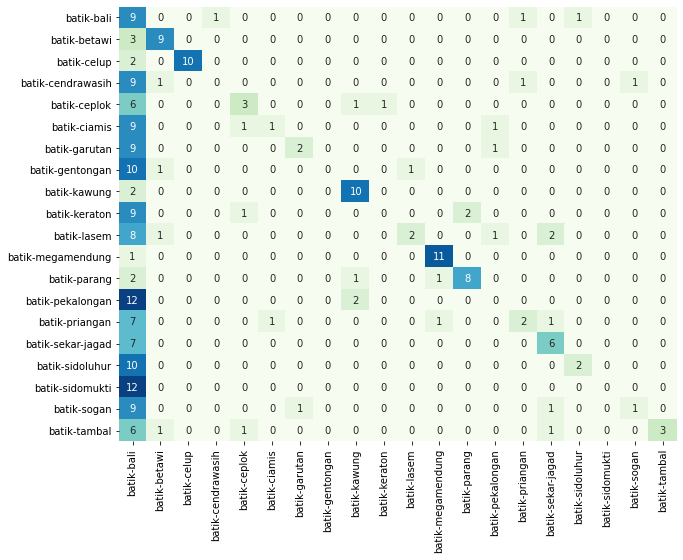

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='GnBu', cbar=False)
plt.xticks(ticks=np.arange(0.5, len(list(dicts.keys()))), labels = list(dicts.keys()), rotation=90)
plt.yticks(ticks=np.arange(0.5, len(list(dicts.keys()))), labels = list(dicts.keys()), rotation=0)
plt.show()

In [45]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.06      0.75      0.12        12
           1       0.69      0.75      0.72        12
           2       1.00      0.83      0.91        12
           3       0.00      0.00      0.00        12
           4       0.50      0.27      0.35        11
           5       0.50      0.08      0.14        12
           6       0.67      0.17      0.27        12
           7       0.00      0.00      0.00        12
           8       0.71      0.83      0.77        12
           9       0.00      0.00      0.00        12
          10       0.67      0.14      0.24        14
          11       0.85      0.92      0.88        12
          12       0.80      0.67      0.73        12
          13       0.00      0.00      0.00        14
          14       0.50      0.17      0.25        12
          15       0.55      0.46      0.50        13
          16       0.67      0.17      0.27        12
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
